In [8]:
 ## initial set up ##
    
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])  
small_board_list    

[1, 2, 4, 8]

In [7]:
## Converting List to NumPy Array ##

import numpy as np
small_board_ndarray = np.array(small_board_list)
small_board_ndarray

array([1, 2, 4, 8])

In [10]:
 ## Problem 1: Number of Wheat on a 2x2 Chessboard ##
    
small_board_ndarray = small_board_ndarray.reshape((2, 2))
small_board_ndarray    

array([[1, 2],
       [4, 8]])

In [13]:
## Problem 2: Expansion to n×m Chessboard ## 

def wheat_chessboard(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = (2 ** indices_of_squares).reshape((n, m))
    return board_ndarray

## Using the Function to Calculate the number of wheat grains on an 8x8 chessboard. ##

board_8x8 = wheat_chessboard(8, 8)
board_8x8

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

In [22]:
## Problem 3: Total Number of Wheat ##

total_wheat = board_8x8.sum()
column_averages = board_8x8.mean(axis=0)
print("Total number of wheat on 8x8 chessboard:", total_wheat, "\n")
print("Column averages:\n", column_averages)

Total number of wheat on 8x8 chessboard: 18446744073709551615 

Column averages:
 [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


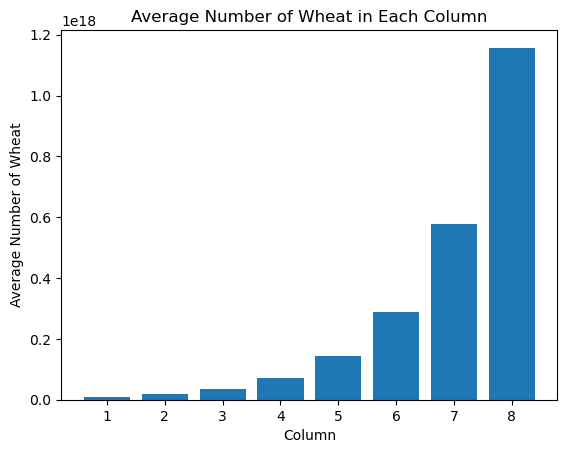

In [26]:
## Bar Chart Visualization ##

import matplotlib.pyplot as plt
 

plt.xlabel("Column")
plt.ylabel("Average Number of Wheat")
plt.title("Average Number of Wheat in Each Column")
plt.bar(np.arange(1, 9), column_averages)
plt.show()

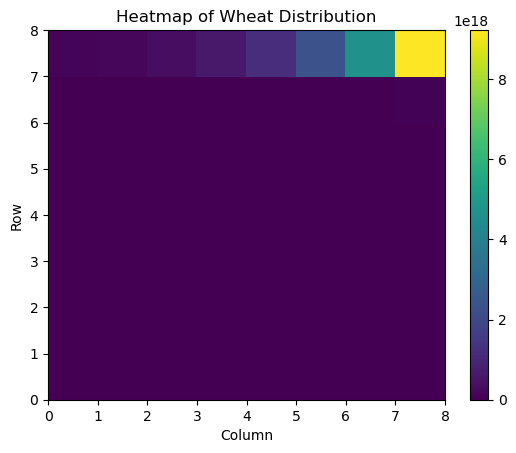

In [30]:
## Problem 4: Heat Map of Wheat Distribution ##

plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of Wheat Distribution")
plt.pcolor(board_8x8)
plt.colorbar()
plt.show()

In [37]:
## Problem 5: Comparing the First and Second Halves ##

first_half_sum = board_8x8[:4, :].sum()
second_half_sum = board_8x8[4:, :].sum()
ratio = second_half_sum / first_half_sum

print("Total number of wheat in the first half:", first_half_sum, "\n")
print("Total number of wheat in the second half:", second_half_sum, "\n")

print("second half is ", "'",ratio, "'", "times as long as the first half") 


Total number of wheat in the first half: 4294967295 

Total number of wheat in the second half: 18446744069414584320 

second half is  ' 4294967296.0 ' times as long as the first half


In [38]:
### Problem 6: Expansion to n × m mass by another calculation method ###

In [60]:
## Using np.append():

def wheat_chessboard_append(n, m):
    n_squares = n * m
    board_ndarray = np.array([1], dtype=np.uint64)
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])
    return board_ndarray.reshape((n, m))

In [59]:
## Using Broadcasting:

def wheat_chessboard_broadcast(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = (2 ** indices_of_squares).reshape((n, m))
    return board_ndarray


In [62]:
board_8x8_append = wheat_chessboard_append(8, 8)
board_8x8_broadcast = wheat_chessboard_broadcast(8, 8)

In [52]:
## [Problem 7] Comparing calculation times ##
 

In [65]:
%%timeit
board_8x8 = wheat_chessboard(8, 8)  


12.4 µs ± 288 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [66]:
%%timeit
board_8x8_append = wheat_chessboard_append(8, 8)


636 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [67]:
%%timeit
board_8x8_broadcast = wheat_chessboard_broadcast(8, 8)

14.5 µs ± 639 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
